In [25]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
#2. Read the data as dataframe
ins=pd.read_csv("insurance.csv")

In [5]:
#3.a Shape of the data, 3.b Datatype of each attribute
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [20]:
#3.c Checking the presence of missing values
ins.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [33]:
#3.d Five point summary or Median, 1st Quartile, 3rd Quartile, Minimum & Maximum values are included in the description
ins.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


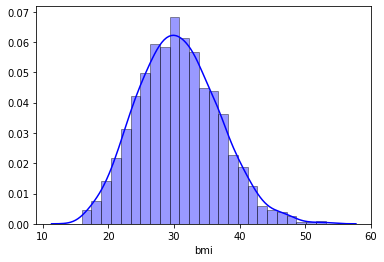

In [32]:
#3.e(1) Distribution of 'bmi' column
sns.distplot(ins['bmi'], hist=True, kde=True, color = 'blue',hist_kws={'edgecolor':'black'})

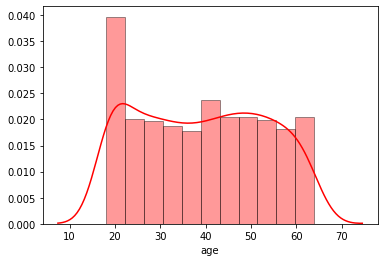

In [30]:
#3.e(2) Distribution of 'age' column
sns.distplot(ins['age'], hist=True, kde=True, color = 'red',hist_kws={'edgecolor':'black'})

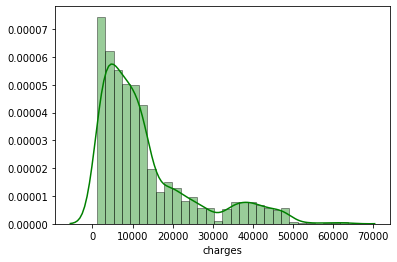

In [31]:
#3.e(3) Distribution of 'charges' column
sns.distplot(ins['charges'], hist=True, kde=True, color = 'green',hist_kws={'edgecolor':'black'})

In [40]:
#3.f 'Age' column is uniformly distributed however 'bmi' is little right skewed but 'charges' column is heavily right skewed
print('Skewness of bmi, age and charges columns are respectively', ins['bmi'].skew(axis = 0, skipna = True), ' and ', ins['age'].skew(axis = 0, skipna = True), ' and ', ins['charges'].skew(axis = 0, skipna = True))

Skewness of bmi, age and charges columns are respectively 0.2840471105987448  and  0.05567251565299186  and  1.5158796580240388


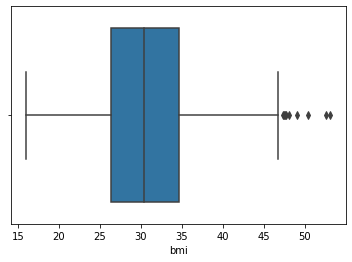

In [52]:
#3.g Chekcing the presence of outliers in 'bmi', 'age' and 'charges' columns which have respectively 6,  and  points/records
#3.g.1 'bmi', there are six outliers
sns.boxplot(x=ins['bmi'])


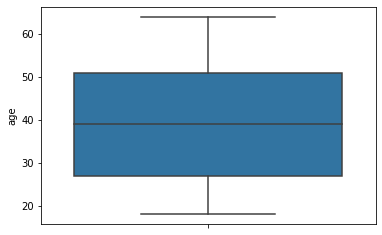

In [53]:
#3.g.2 'age', there are no outliers
sns.boxplot(y=ins['age'])

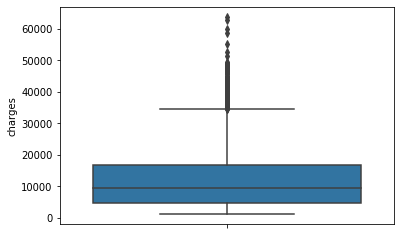

In [54]:
#3.g.2 'charges', there are multiple outliers
sns.boxplot(y=ins['charges'])

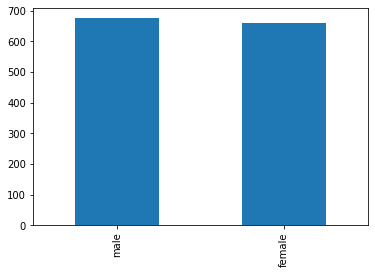

In [56]:
#3.h(1) Distribution of 'sex' column
ins['sex'].value_counts().plot(kind='bar')

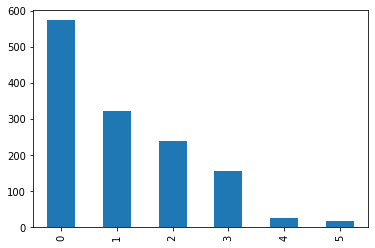

In [57]:
#3.h(2) Distribution of 'children' column
ins['children'].value_counts().plot(kind='bar')

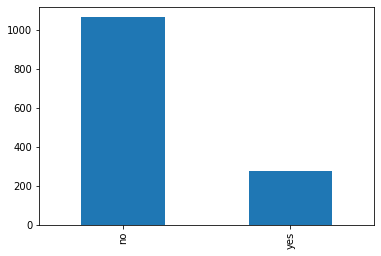

In [58]:
#3.h(3) Distribution of 'smoker' column
ins['smoker'].value_counts().plot(kind='bar')

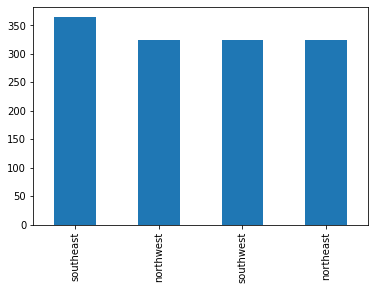

In [59]:
#3.h(4) Distribution of 'region' column
ins['region'].value_counts().plot(kind='bar')

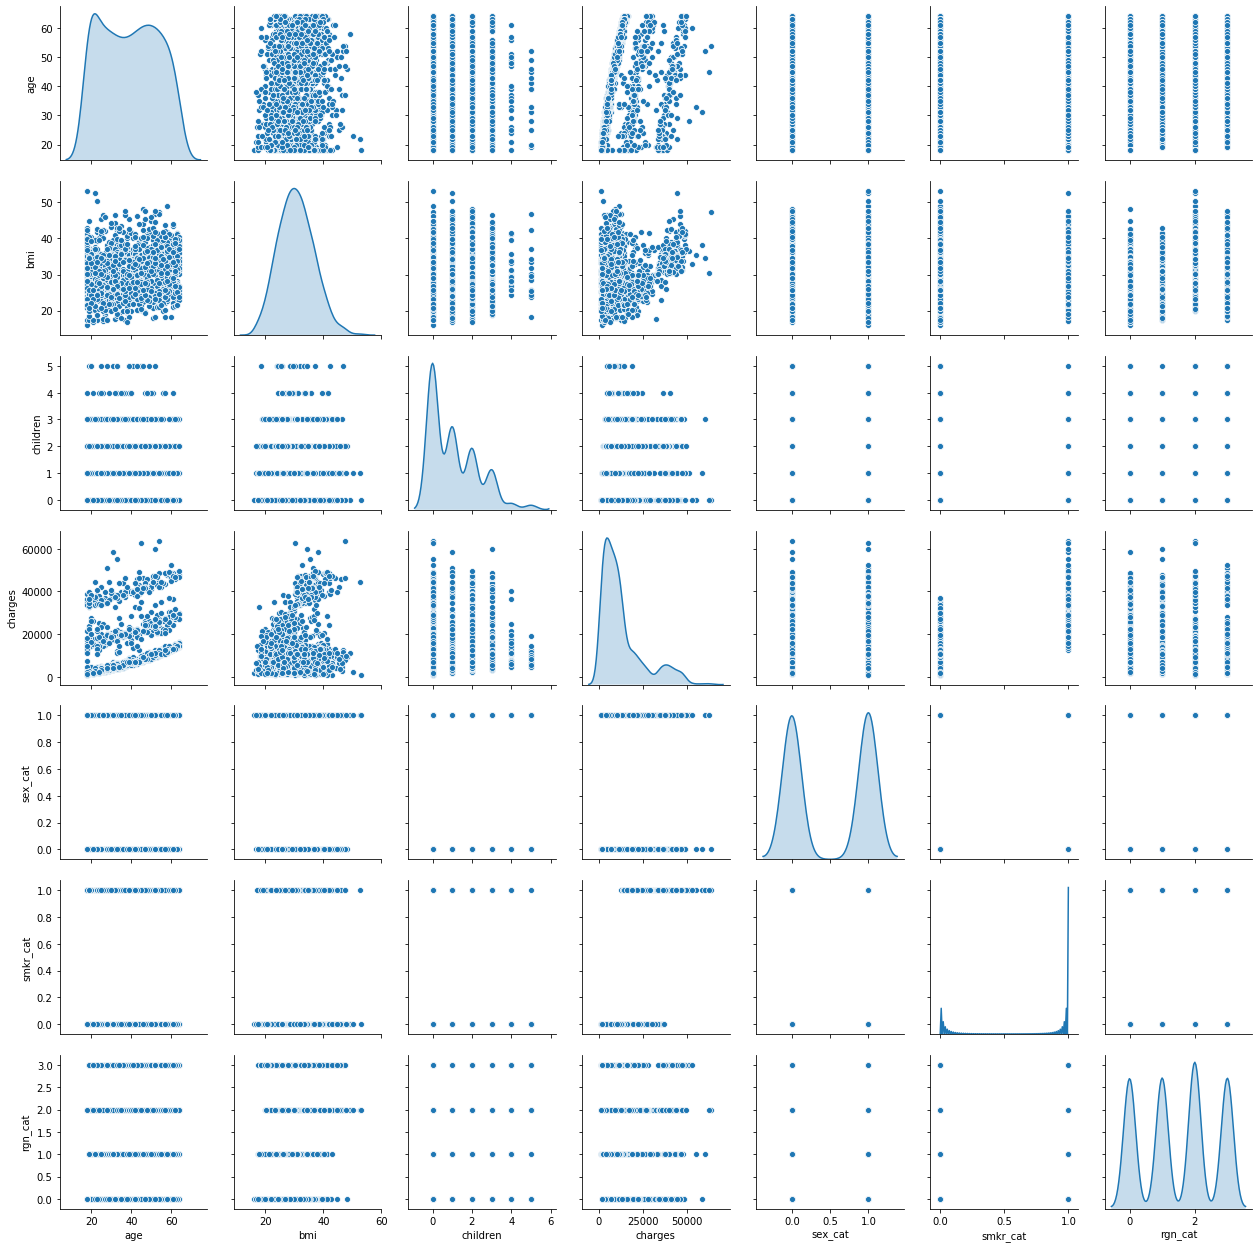

In [84]:
#3.i Converting object datatypes namely 'sex', 'smoker' and 'region' into categorical codes for them to be used in Seaborn PairPlot
ins['sex_cat'] = ins['sex'].astype('category').cat.codes
ins['smkr_cat'] = ins['smoker'].astype('category').cat.codes
ins['rgn_cat'] = ins['region'].astype('category').cat.codes
sns.pairplot(ins, diag_kind="kde")

In [85]:
#4.a Do charges of people who smoke differ significantly from the people who don't?

#Answer: 
#As we can check from ins.head() that the new columns 'sex_cat', 'smkr_cat' and 'rgn_cat' are having values as 
# 'sex_cat' = 0 for female, 1 for male; 'smkr_cat' = 0 for non-smoker, 1 for smoker and 'rgn_cat' = 0,1,2,3 for NorthEast,
# NorthWest, SouthEast, SouthWest respectively ...continued....

ins.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
sex_cat     1338 non-null int8
smkr_cat    1338 non-null int8
rgn_cat     1338 non-null int8
dtypes: float64(2), int64(2), int8(3), object(3)
memory usage: 77.2+ KB


,age,sex,bmi,children,smoker,region,charges,sex_cat,smkr_cat,rgn_cat
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,3
1,18,male,33.770,1,no,southeast,1725.55230,1,0,2
2,28,male,33.000,3,no,southeast,4449.46200,1,0,2
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1


In [ ]:
#...we can conclude from the pairplot Out[84] that 'charges' are high for 'smkr_cat' =1 or for smoker 

In [ ]:
#4.b Does bmi of males differ significantly from that of females?

#Answer: 
#As we can check from ins.head() at Out[85] that the new column 'sex_cat' = 0 for female, 1 for male, so we can conclude from
#the pairplot at Out[84] that 'bmi' is almost same for 'sex_cat' =1 (i.e.male) or it does not differ significatnly for males and
#females

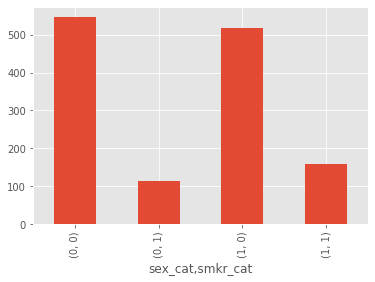

In [120]:
#4.c Is the proportion of smokers significantly different in different genders?


#Answer: 
#Since the pairplot does not give any meaningful information about this aspect, a box plot between the two columns is shown below
ins.groupby(["sex_cat", "smkr_cat"]).size().plot(kind='bar')
#From the graph below, we can visually conclude that the four bars are female non-smokers, female smokers, male non-smokers and male-smokers
#or the percentage of smokers is lesser in female than that in make

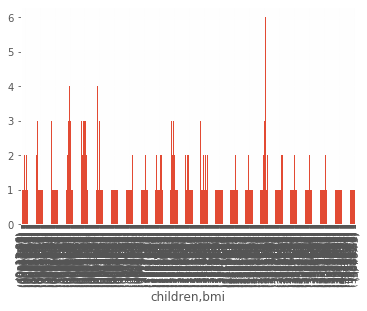

In [123]:
#4.d Is the distribution of bmi across women with no children, one child and two children, the same?

#Answer: 
#To get a clearer picture than that from Out[85] the below plot of the type Out[120] shows that the distribution of bmi among 
#women with no children, one child and two children varies considerably i.e. where women with no children are having bmi ranging
#from least to highest value observed, that of women with two child is a little right skewed and that of women with three child
#is further right skewed

ins.groupby(["children","bmi"]).size().plot(kind='bar')